## Image classification with MNIST dataset
MNIST dataset contains 65,000 handwritten digit images which size is 28 by 28. CNNs model is used for image classifcation. 

#### Library used
For the task, it mainly uses tensorflow and matplotlib for visualization. 

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

#### Step1) Read dataset 
MNIST contains 65,000 images. 55,000 for training set and the rest for testing set.

In [ ]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

The size of each image is 28 by 28 and each image has a label in the range of 0 to 9. When visualizing the image randomly, it looks like following. 

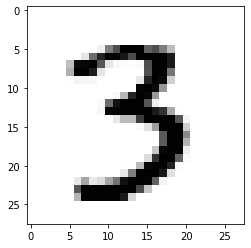

In [3]:
images = 5000
plt.imshow(mnist.train.images[images].reshape(28,28), cmap='Greys')

#### Step2) Build CNN structure 
To implement CNNs in Tensorflow, there is two different variables concepts called Placeholder and Variable. Placeholder is similar to a variable which carrying data. Variable is a parameter of the algorithm. 

It defines independent and dependent variables called X and Y. X is image and Y is label. The size of image is 28 by 28. It can process the certain number of images and the input size is 784(28x28). 

In [4]:
X = tf.placeholder(tf.float32, shape=[None, 784])
Y = tf.placeholder(tf.float32, shape=[None, 10])
X_img = tf.reshape(X, [-1, 28, 28, 1]) # gray scale

CNN model here builds 3 layers, first hidden layer, second hidden layer and fully connected layer. In first layer, it uses 32 filters which size is 3x3x1 with max pooling. After passing the first layer, the size of image becomes 14x14x32.

In [5]:
# First layer
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32]))
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In second layer, it uses 64 filters which size is 3x3x32 with max pooling. After passing the first layer, the size of image becomes 7x7x64.

In [6]:
# Second layer
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64])) 
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

For fully connected layer, it should reshape the layer to flat. Then it gets a layer which size is 3136.

In [7]:
# Fully connected layer
L2 = tf.reshape(L2, [-1, 7*7*64])
W3 = tf.get_variable("W3", shape=[7*7*64, 10], initializer=tf.contrib.layers.xavier_initializer())
B = tf.Variable(tf.random_normal([10]))

#### Step3) Set cost function and others

In [8]:
hypothesis = tf.matmul(L2, W3) + B
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=Y))
optimizer= tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

#### Step4) Train the model
For each epoch, it processes 100 images. After 10 iterations, its accuracy on testing data is 0.9751. 

In [9]:
batch_size = 100
num_epochs = 10

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(num_epochs):
        avg_cost = 0
        num_iterations = int(mnist.train.num_examples/batch_size)
    
        for iteration in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            cost_val, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_epochs
        
        print(epoch, avg_cost)
        
    print("Accuracy:", sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

0 170.04250562083917
1 4.591602135752333
2 3.3116890602570517
3 3.2099733780589332
4 3.072328393791394
5 3.3961040907262894
6 3.1987190199177316
7 3.470390222891367
8 3.268065386656622
9 3.231512241617735
Accuracy: 0.9751
